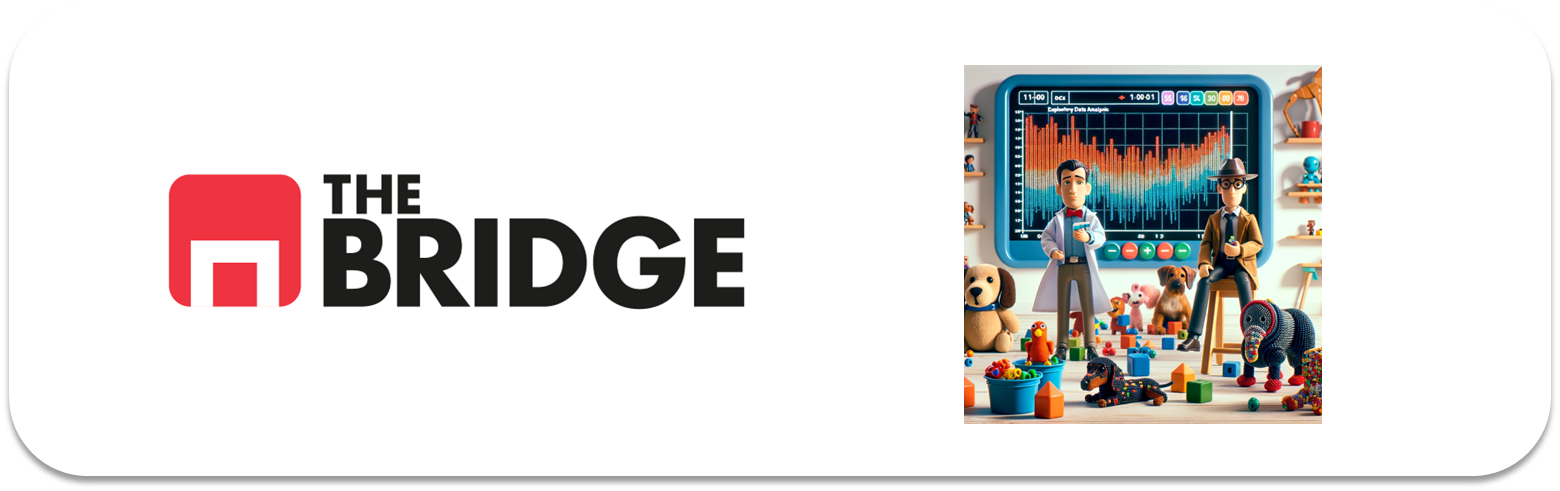

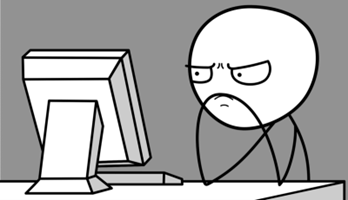

Para ejercitarte y afianzar lo aprendido sobre el análisis bivariante, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_combined_graphs, pinta_distribucion_categoricas, plot_categorical_relationship_fin,\
      plot_grouped_boxplots,plot_grouped_histograms, grafico_dispersion_con_correlacion, plot_categorical_numerical_relationship
from scipy.stats import pearsonr

### Ejercicio 1

Carga el dataset de admisiones que conoces de la unidad anterior y que se encuentra en la ruta "./data/admission_data.csv", deshazte de las columnas innecesarias

In [3]:
df_admision = pd.read_csv("./data/admission_data.csv")

In [4]:
df_admision

,Unnamed: 0,Year,Major,Gender,Admission
0,0,1973,School of Medicine,F,Rejected
1,1,1973,Department of Economics,M,Accepted
2,2,1973,Other,F,Accepted
3,3,1973,Other,M,Accepted
4,4,1973,Other,M,Rejected
...,...,...,...,...,...
12758,12758,1973,Other,M,Accepted
12759,12759,1973,Department of Mechanical Engineering,M,Accepted
12760,12760,1973,Other,F,Rejected
12761,12761,1973,Other,M,Rejected


*Recordamos que tanto "Unnamed: 0" como "Year" no aportaban nada*

In [5]:
df_admision.drop(["Unnamed: 0","Year"], axis = 1, inplace = True)

### Ejercicio 2

Haz el análisis bivariante de "Admission" y "Major" (emplea las funciones del workout importándolas del módulo `bootcampviztools`, o utiliza las visualizaciones del notebook en el repositorio) y contesta a las siguientes preguntas:
* ¿Cuál es el departamento con el mayor porcentaje de admsiones?¿Y el de menor?
* ¿Existe alguna diferencia destacada entre los departamentos?

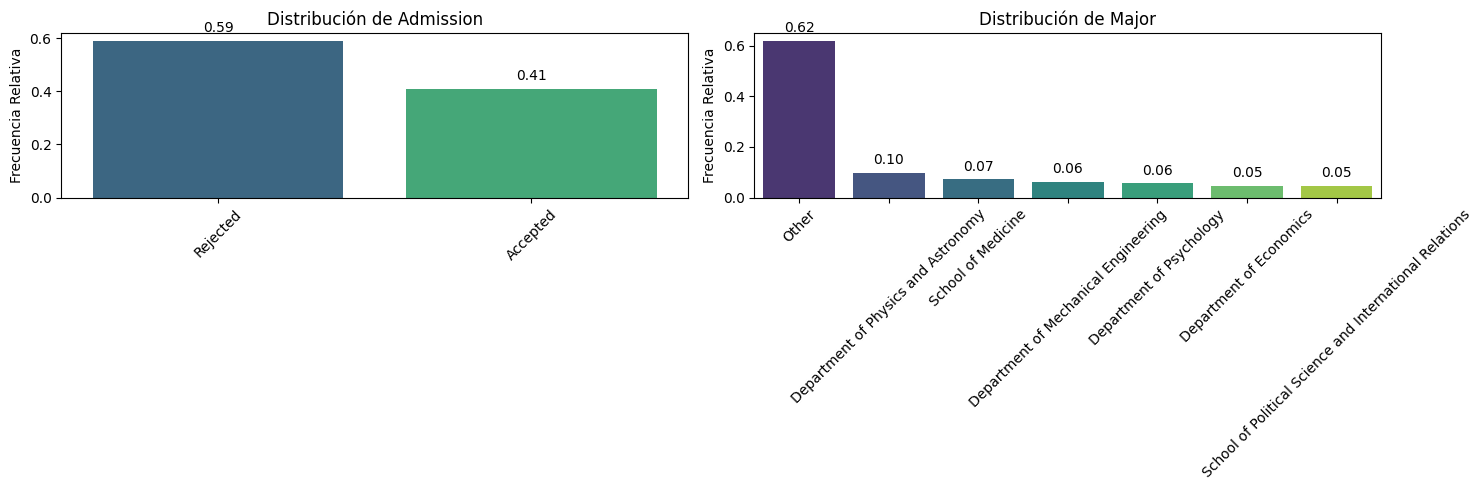

In [6]:
# Recuperamos las frecuencias relativas

pinta_distribucion_categoricas(df_admision,["Admission","Major"], relativa= True, mostrar_valores= True)

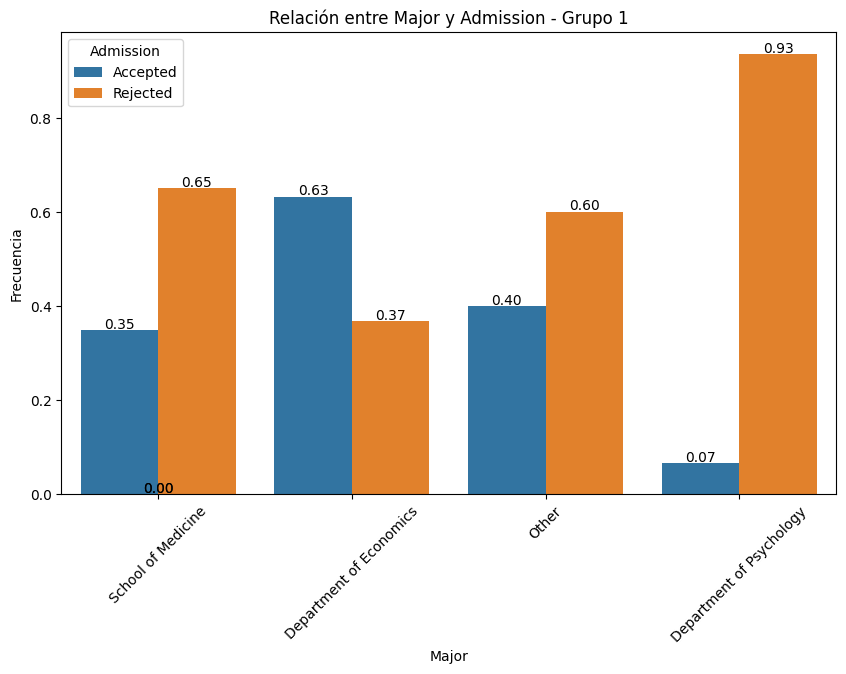

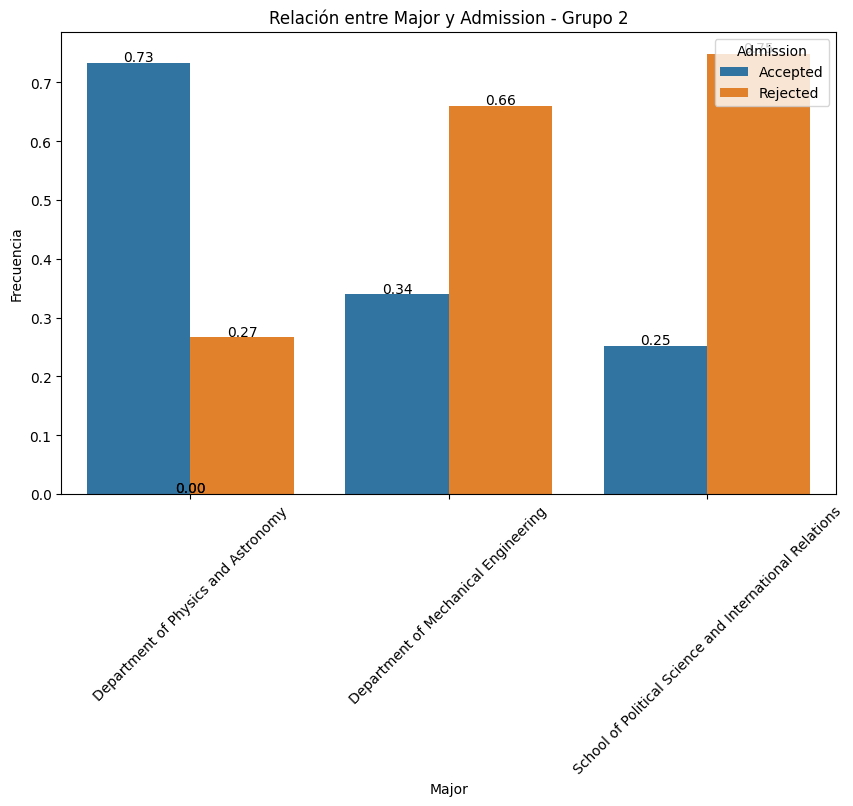

In [7]:
# Hacemos el análisis bivariante visual: Utilizando la función plot_categorical_relationship
plot_categorical_relationship_fin(df_admision, "Major","Admission", relative_freq= True, size_group= 4, show_values= True)

*Claramente hay diferencias entre ellos y respecto al conjunto global de porcentajes de admisiones*

El análisis bivariante entre "Admission" y "Major" arroja los siguientes resultados:

- **Mayor porcentaje de admisiones**: El Departamento de Física y Astronomía tiene el mayor porcentaje de admisiones, con un 73%.
- **Menor porcentaje de admisiones**: El Departamento de sicología tiene el menor porcentaje de admisiones entre los presentados en el dataset, con un 7%.

En cuanto a las diferencias destacadas entre los departamentos, sí existen. Por ejemplo, el Departamento de Física y Astronomía y el Departamento de Economía tienen tasas de admisión considerablemente más altas (73% y 63%, respectivamente) en comparación con otros departamentos como el de Medicina (35%), el de Ingeniería Mecánica (34%) y el citado de sicología (7%). Esto sugiere que la probabilidad de ser admitido varía significativamente entre los diferentes departamentos.

### Ejercicio 3

Repite el análisis para "Admission" y "Gender" y responde a las siguientes preguntas:
* ¿Existe una diferencia visual significativa entre el porcentaje de admitidos de cada género?
* ¿Cuál de los dos grupos tiene más admisiones?

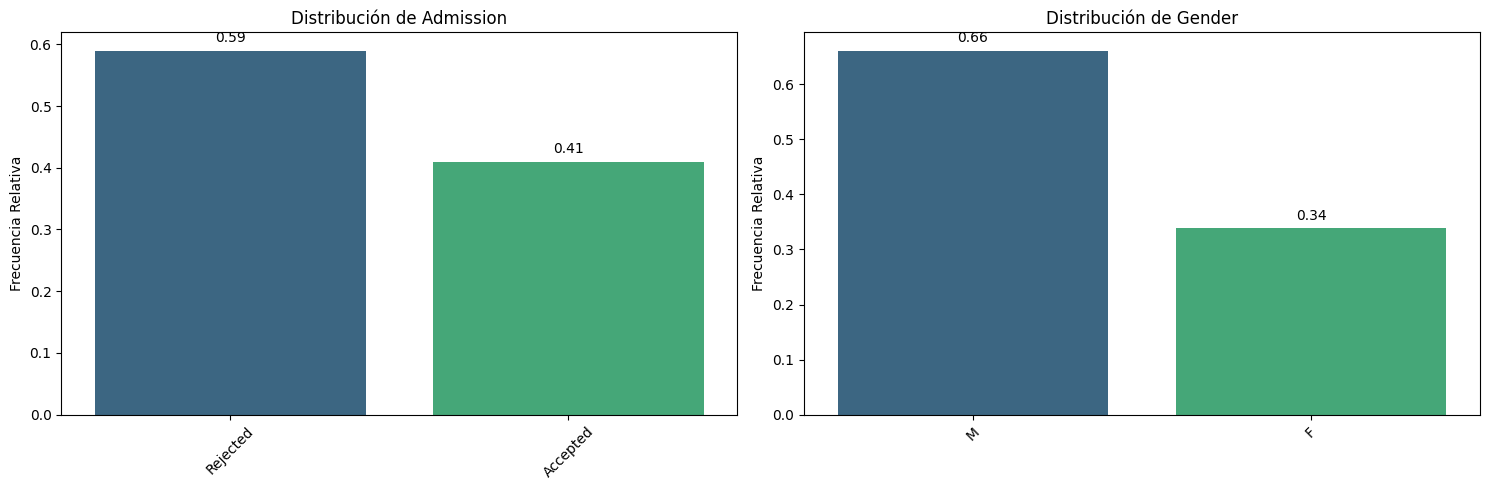

In [8]:
# Recuperamos las frecuencias relativas

pinta_distribucion_categoricas(df_admision,["Admission","Gender"], relativa= True, mostrar_valores= True)

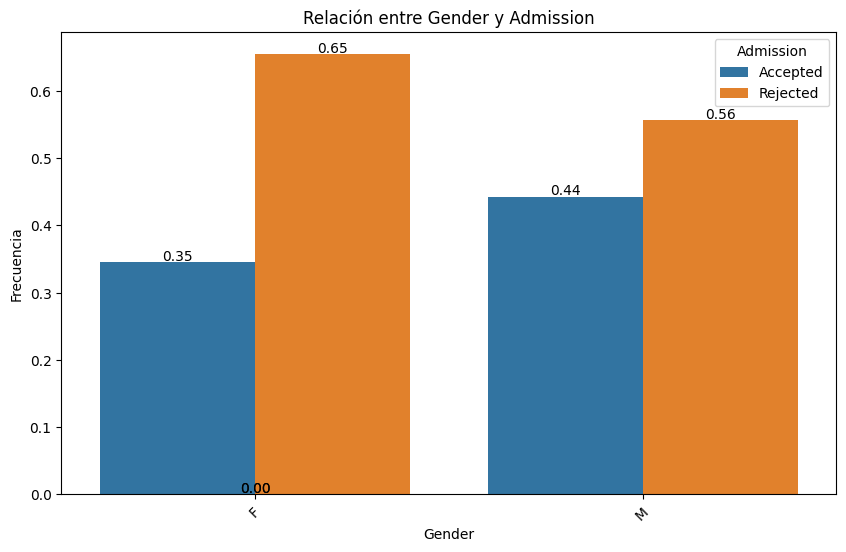

In [9]:
# Hacemos el análisis bivariante visual: Utilizando la función plot_categorical_relationship
plot_categorical_relationship_fin(df_admision, "Gender","Admission", relative_freq= True, size_group= 4, show_values= True)

*Para poder contestar a la segunda pregunta debemos hacer el análisis de frecuencias absolutas*

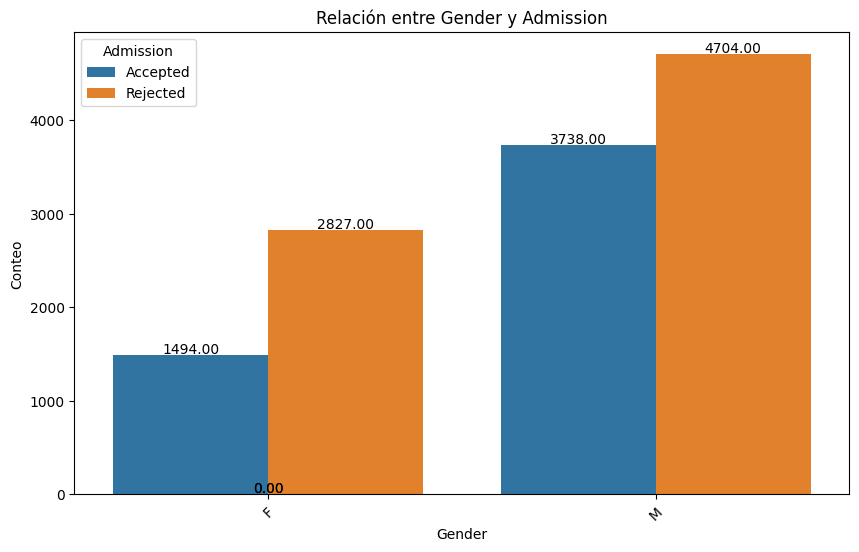

In [10]:
# Hacemos el análisis bivariante visual: Utilizando la función plot_categorical_relationship
plot_categorical_relationship_fin(df_admision, "Gender","Admission", relative_freq= False, size_group= 4, show_values= True)

El análisis bivariante entre "Admission" y "Gender" revela lo siguiente:

- **Diferencia en porcentaje de admitidos por género**: Existe una diferencia significativa entre los porcentajes de admisión de cada género. El 44% de los solicitantes masculinos fueron admitidos, mientras que solo el 35% de las solicitantes femeninas fueron admitidas.

- **Grupo con más admisiones**: El grupo de los hombres tiene más admisiones en números absolutos, con 3738 admisiones, en comparación con 1494 admisiones entre las mujeres. Esto indica no solo una tasa de admisión más alta para los hombres, sino también un número total mayor de admisiones.

### Ejercicio 4

Carga el dataset de propinas (tips) que conoces de la unidad anterior y que se encuentra en la ruta "./data/tips.csv", deshazte de las columnas innecesarias

In [11]:
df_tips = pd.read_csv("./data/tips.csv")

In [12]:
df_tips.drop("Unnamed: 0", axis = 1, inplace = True)

In [13]:
df_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Ejercicio 5

Haz el análisis bivariante de "tip" y "sex" (emplea las funciones del workout importándolas del módulo `bootcampviztools`, o utiliza las visualizaciones del notebook en el repositorio), añade el cálculo de la media y mediana de la variable continua por cada valor de la variable categórica, y contesta a las siguientes preguntas:
* ¿Existe alguna diferencia visualmente significativa entre las propinas de los grupos de la variable "sex"?
* ¿Son diferentes respecto al  conjunto total?

(2,)


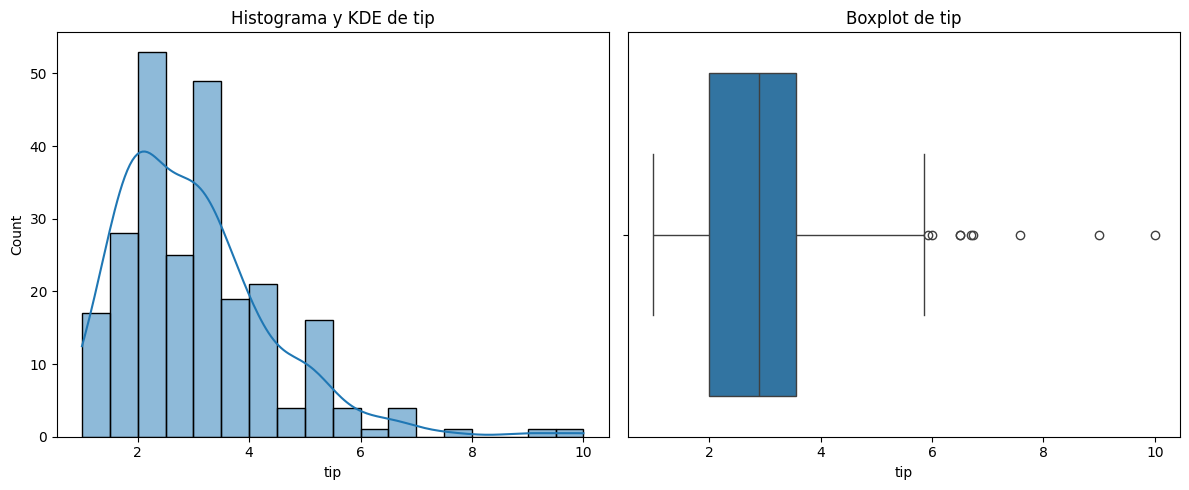

In [14]:
# Valores individuales:
plot_combined_graphs(df_tips,["tip"])

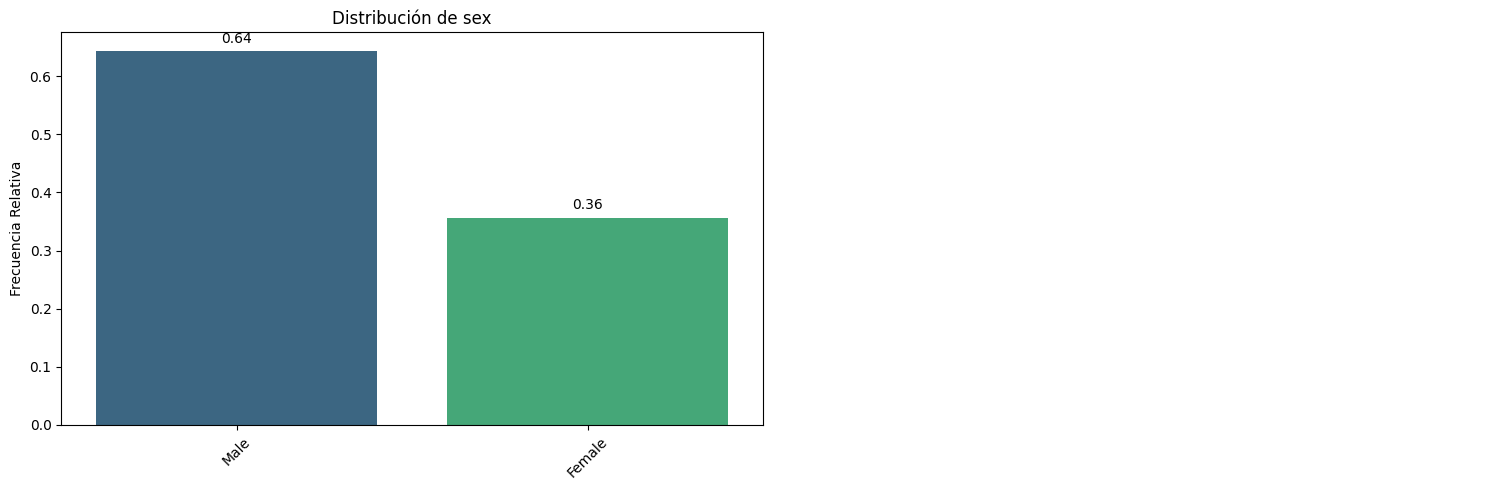

In [15]:
pinta_distribucion_categoricas(df_tips,["sex"], relativa=True, mostrar_valores=True)

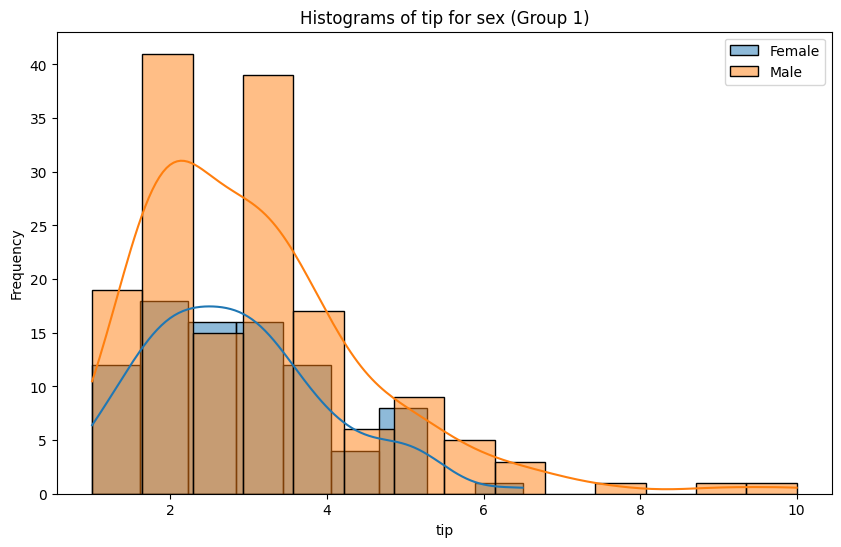

In [16]:
# Comparamos los histogramas

plot_grouped_histograms(df_tips, "sex","tip", group_size= 2)

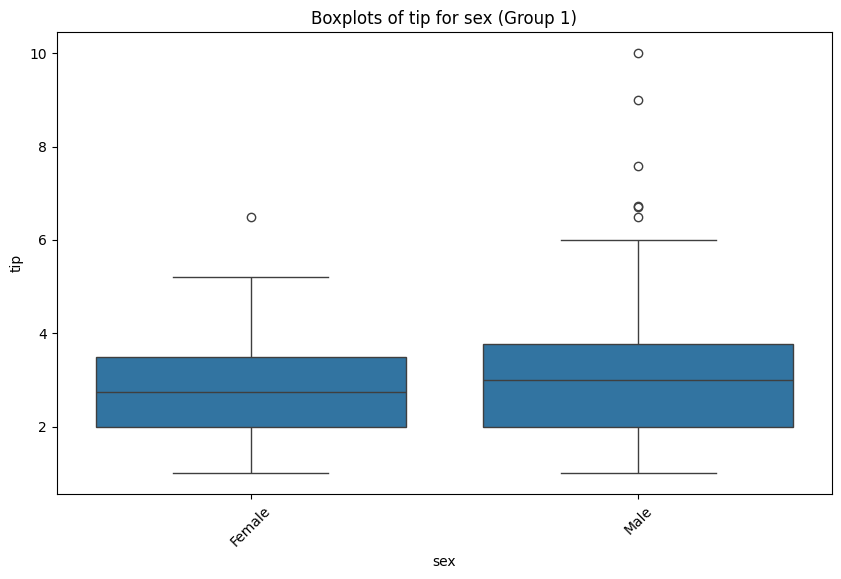

In [17]:
# Comparamos los boxplots

plot_grouped_boxplots(df_tips, "sex","tip")

In [18]:
# Finalmente, veamos las medias y medianas para cada grupo (como complemento)

df_tips.groupby("sex")["tip"].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,87.0,2.833448,1.159495,1.0,2.0,2.75,3.50,6.5
Male,157.0,3.089618,1.489102,1.0,2.0,3.00,3.76,10.0


La visualización de las propinas ("tip") por género ("sex") muestra las siguientes observaciones:

- **Diferencia visualmente significativa entre las propinas de los grupos de género**: Existe una diferencia visual, en la comparación de histogramas se ve que la distribución de valores es más dispersa y con más rango para "male" que para "female". En general, considerando las medidas de tendencia central, las de posición y el diagrama de caja, parece que los hombres tienden a dejar propinas más altas en comparación con las mujeres. Para poder generalizar más allá del dataset, será bueno hacer un contraste de hipótesis de relación entre las variables. Como se verá en el siguiente grupo de píldoras.

- **Comparación con el conjunto total**: La mayor presencia de "hombres" claramente influye en la distribución total de tips, que se parece bastante a la de los hombres e invita a hacer un análisis por separado de entre hombres y mujeres.

### Ejercicio 6

Repite el análisis pero esta vez para "tip" y "smoker", añade también el cálculo de la media y de la mediana de la variable continua por cada valor de la variable categórica, y contesta a las siguiente pregunta:
* ¿Existe alguna diferencia visualmente significativa entre las propinas de los grupos de la variable "smoker"?

(2,)


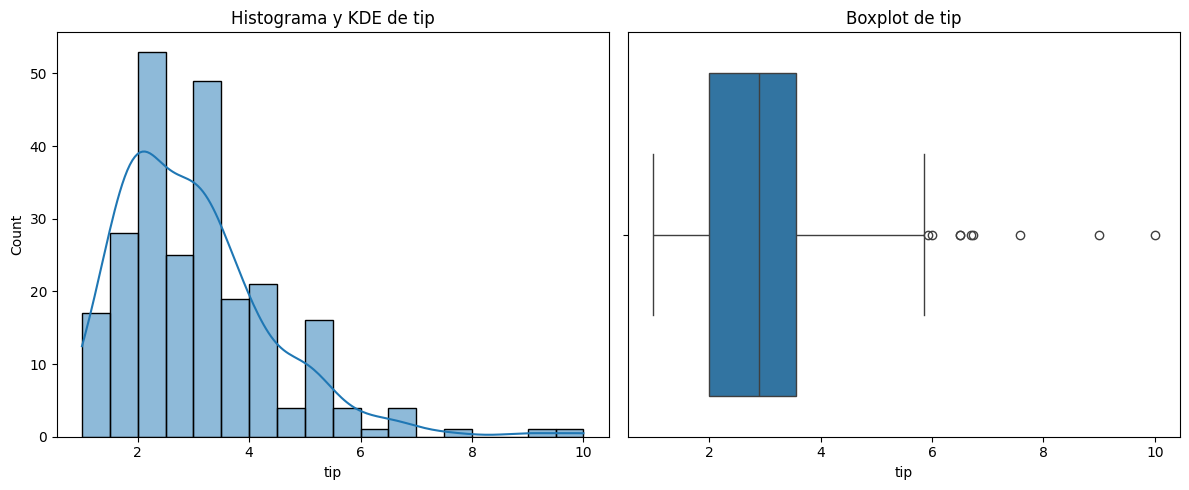

In [19]:
# Valores individuales:
plot_combined_graphs(df_tips,["tip"])

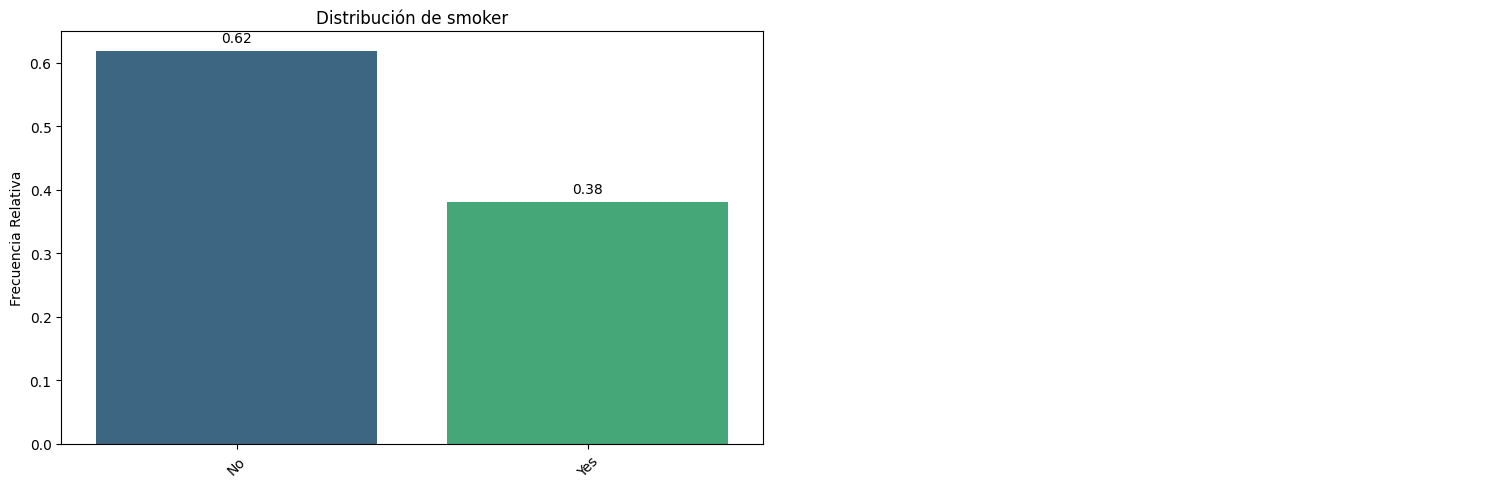

In [20]:
pinta_distribucion_categoricas(df_tips,["smoker"], relativa=True, mostrar_valores=True)

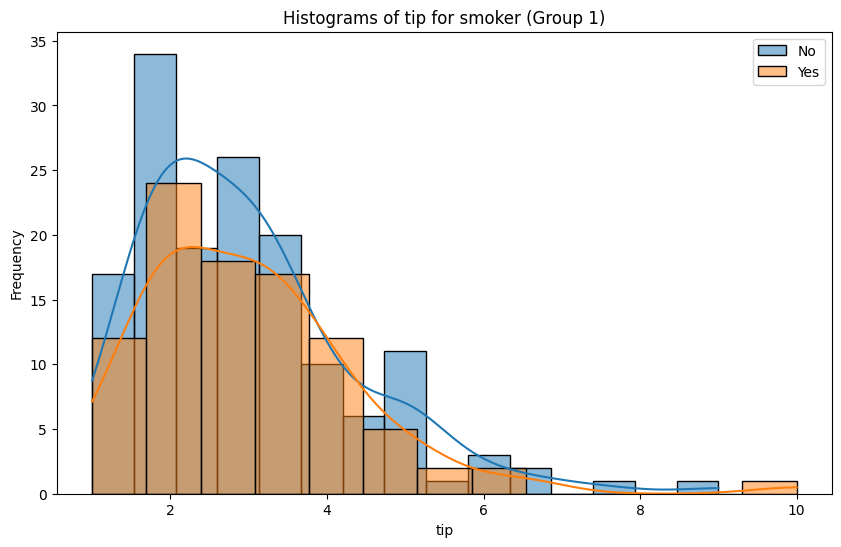

In [21]:
# Comparamos los histogramas

plot_grouped_histograms(df_tips, "smoker","tip", group_size= 2)

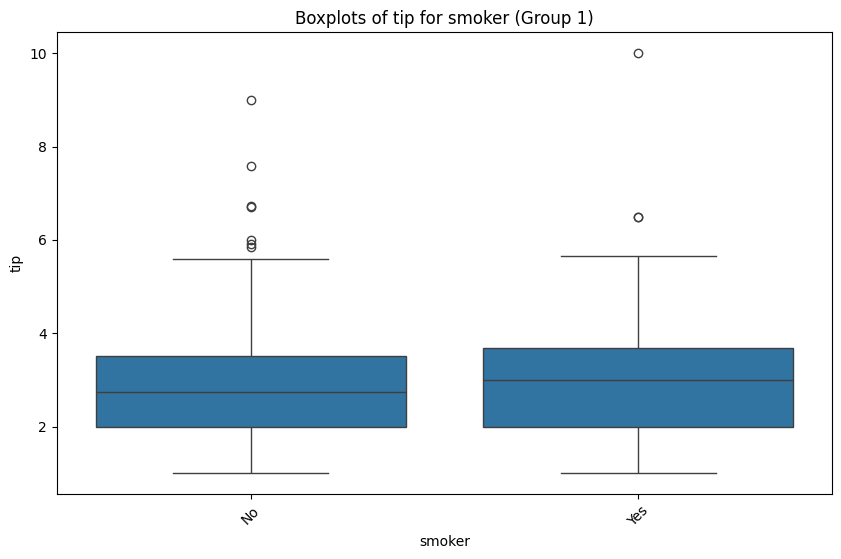

In [22]:
# Comparamos los boxplots

plot_grouped_boxplots(df_tips, "smoker","tip")

In [23]:
# Finalmente, veamos las medias y medianas para cada grupo 

df_tips.groupby("smoker")["tip"].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,2.991854,1.377190,1.0,2.0,2.74,3.505,9.0
Yes,93.0,3.008710,1.401468,1.0,2.0,3.00,3.680,10.0



- **Diferencia visualmente significativa entre las propinas de los grupos de "smoker"**: Basándonos en los gráficos y lasd medidas numéricas, la diferencia entre los fumadores y los no fumadores no parece ser visualmente significativa. Ambos grupos presentan distribuciones de propinas bastante similares, con medianas y rangos intercuartílicos comparables.

- **Media y Mediana de las propinas**:
  - Para los no fumadores, la media de las propinas es de aproximadamente 2.99 y la mediana es 2.74.
  - Para los fumadores, la media es ligeramente más alta, alrededor de 3.01, con una mediana de 3.00.

Estos resultados sugieren que, aunque hay una ligera diferencia en las medias, la diferencia general en las propinas entre fumadores y no fumadores no es considerablemente significativa desde el punto de vista visual.

### Ejericicio 7

Carga ahora el datase de accidentes de coches, que se encuentra en la ruta "./data/car_crashes.csv" y deshazte de las columnas innecesarias

In [24]:
df_cars = pd.read_csv("./data/car_crashes.csv", sep = "|")
df_cars.head()

,Unnamed: 0,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [25]:
df_cars.drop("Unnamed: 0", axis = 1, inplace = True)

### Ejericicio 8

Haz un analisis bivairante entre "total" y "speeding". Muestra su diagrama de dispersión y su valor de correlación de pearson obtenido con pandas. Luego contesta a la siguiente pregunta
* ¿Existe alguna relación visual entre las variables?¿Y numérica?

In [26]:
# Primero, los valores individuales con sus medidas de tendencia:

df_cars[["total","speeding"]].describe()

,total,speeding
count,51.000000,51.000000
mean,15.790196,4.998196
std,4.122002,2.017747
min,5.900000,1.792000
25%,12.750000,3.766500
50%,15.600000,4.608000
75%,18.500000,6.439000
max,23.900000,9.450000


(2, 2)


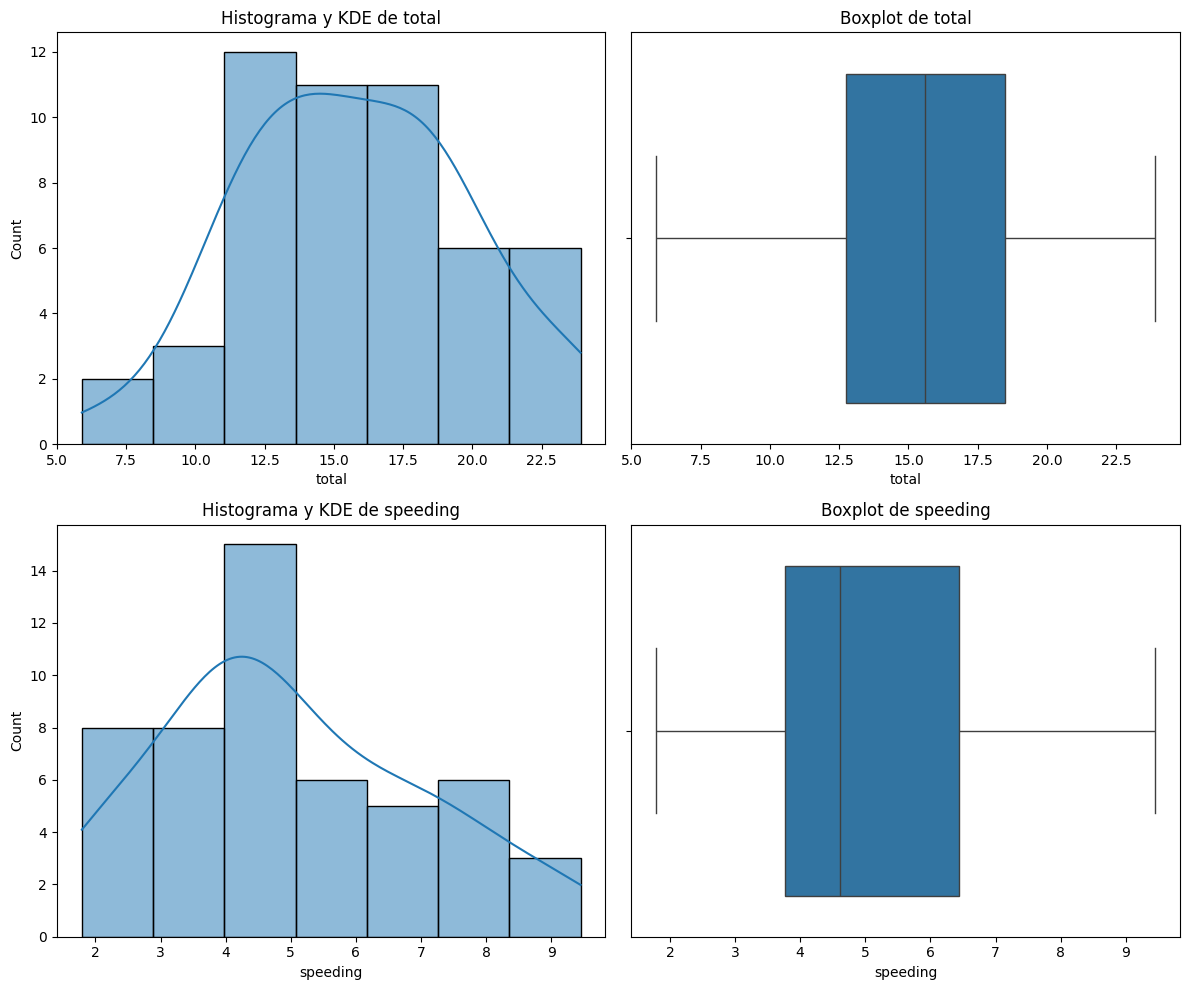

In [27]:
plot_combined_graphs(df_cars,["total","speeding"])

In [28]:
#Obtención del coeficiente con pandas
df_cars[["total","speeding"]].corr()

,total,speeding
total,1.000000,0.611548
speeding,0.611548,1.000000


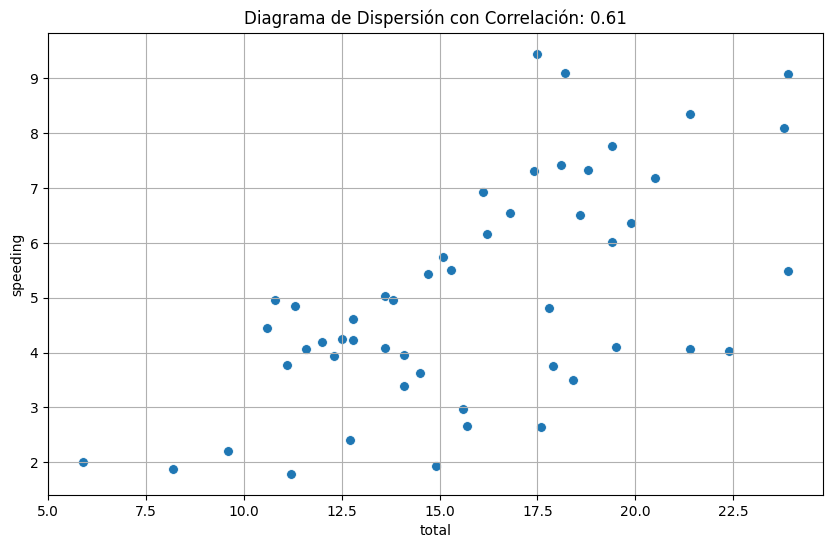

In [75]:
# Diagrama de dispersión con valor de correlación
grafico_dispersion_con_correlacion(df_cars,"total","speeding", mostrar_correlacion= True)



- **Relación visual entre las variables**: Existe una tendencia visualmente aparente en el gráfico de dispersión que indica una relación positiva entre el número total de accidentes y los accidentes relacionados con el exceso de velocidad. A medida que aumenta el número total de accidentes, también parece aumentar la cantidad de accidentes relacionados con el exceso de velocidad.

- **Relación numérica**: El coeficiente de correlación de Pearson es aproximadamente 0.61, lo que indica una correlación positiva moderada entre las dos variables.

En resumen, tanto visual como numéricamente, existe una relación significativa entre el número total de accidentes de tráfico y los accidentes relacionados con el exceso de velocidad.

### Ejercicio 9

Usa scipy tal como lo hicimos en el workout para hacer el test de correlación. ¿Cuál es el p-value?¿Qué podemos decir de la correlación lineal entre "total" y "speeding"?

In [69]:
pearsonr(df_cars["total"], df_cars["speeding"])

PearsonRResult(statistic=0.6115476008001184, pvalue=1.867039110905684e-06)

El p-value es 1.86*10^-6, es decir muy por debajo de 0.05.

Para el p-value mostrado parece claro que podemos rechazar la hipótesis de inpendencia y decir que existe una relación lineal entre "total" y "speeding" estadísticamente significativa. A mayor numero de accidentes mayor es en general el número de accidentes en los que el factor velocidad tuvo que ver. De hecho esto invita a hacer una tasa de accidentes donde la velocidad tuvo que ver y comprobar como es su distribución, etc. 